In [3]:
from matplotlib import pyplot as plot
import csv
import numpy as np

In [2]:
def consistent_plot(X, Y, labels, formats, alphas, xlabel, ylabel, title, save_name, bar = "NO"):
    """The arguments are all lists!"""
    plot.figure(figsize=(16,12))
    FONT_SIZE = 36
    plot.figure(figsize=(16,12))
    plot.rc('font', size=FONT_SIZE)          # controls default text sizes
    plot.rc('axes', titlesize=FONT_SIZE)     # fontsize of the axes title
    plot.rc('axes', labelsize=FONT_SIZE)    # fontsize of the x and y labels
    plot.rc('xtick', labelsize=FONT_SIZE)    # fontsize of the tick labels
    plot.rc('ytick', labelsize=FONT_SIZE)    # fontsize of the tick labels
    plot.rc('legend', fontsize=FONT_SIZE)    # legend fontsize
    plot.rc('figure', titlesize=FONT_SIZE)  # fontsize of the figure title
    for i, j in enumerate(labels):
        if "YES" in bar:
            plot.bar(X[i], Y[i], alpha = alphas[i], width=(X[i][0]-X[i][1])/2, label = labels[i])
        else:        
            if len(formats) > 0:
                plot.plot(X[i], Y[i], formats[i], alpha = alphas[i], markersize=5.0,linewidth=3.0,label = labels[i])
            else:
                plot.plot(X[i], Y[i], alpha = alphas[i], markersize=5.0,linewidth=3.0,label = labels[i])
    plot.xlabel(xlabel)
    plot.ylabel(ylabel)
    #plot.xticks(fontsize = 36)
    #plot.yticks(fontsize = 36)
    plot.title(title)
    plot.legend()
    plot.grid()
    plot.savefig(save_name + '.png')
    plot.show()

In [3]:
lfsr_output = []
uniform_output = []
with open('random.csv', newline='') as csvfile:
    generated = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in generated:
        lfsr_output.append(int(row[0]))
        uniform_output.append(float(row[1]))

In [4]:
lfsr_range = np.linspace(min(lfsr_output), max(lfsr_output), num =40)
uniform_range = np.linspace(min(uniform_output), max(uniform_output), num =40)
uniform_hist, uniform_bin_edges = np.histogram(uniform_output, bins = uniform_range)
lfsr_hist, lfsr_bin_edges = np.histogram(lfsr_output, bins = lfsr_range)
np.mean(uniform_output)

0.5001099442856374

<Figure size 1152x864 with 0 Axes>

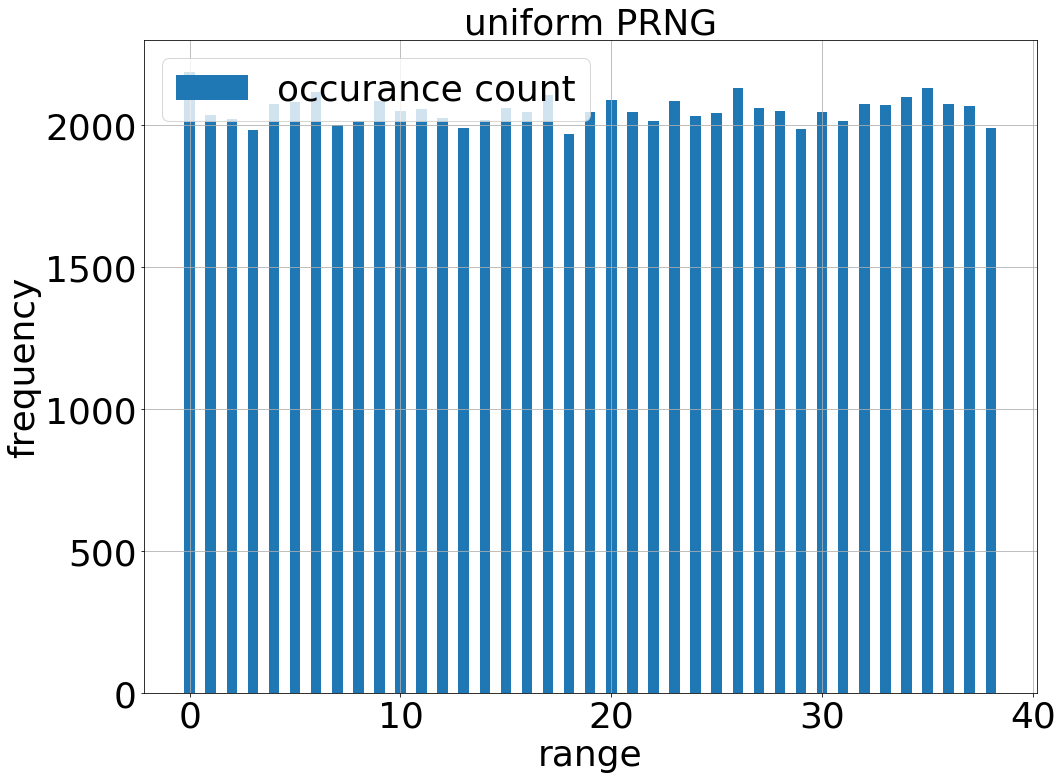

In [7]:
consistent_plot([[i for i in range(len(lfsr_bin_edges[1:]))]], [lfsr_hist], ['occurance count'], '-', [1], 'range', 'frequency', 'uniform PRNG', 'lfsr_PRNG', bar = "YES")

<Figure size 1152x864 with 0 Axes>

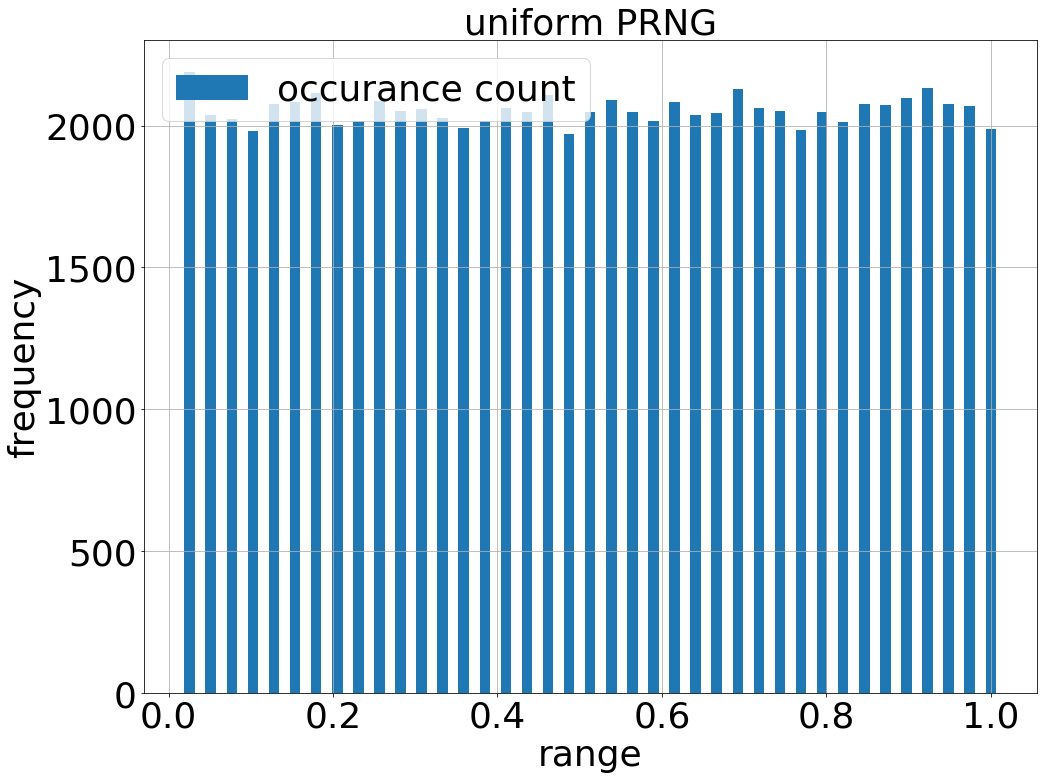

In [8]:
consistent_plot([uniform_bin_edges[1:]], [uniform_hist], ['occurance count'], '-', [1], 'range', 'frequency', 'uniform PRNG', 'uniform_PRNG', bar = "YES")

Generating input file for QIO test.

In [19]:
problem_size = 64
QUBO_file = 'QUBO.csv'

In [20]:
class QUBO():
    def __init__(self, problem_size):
        self.problem_size = problem_size
        self.coef_matrix = np.zeros((problem_size,problem_size))
        self.current_solution = np.zeros(problem_size)
    def write_file(self, QUBO_file):
        """This function is used for creating inputs for the hardware test bench. Use send_to_hardware to send to the solver"""
        with open(QUBO_file, 'w') as f:
            for i in self.current_solution:
                f.write(str(i) + '\n')
            for i in self.coef_matrix.reshape(problem_size*problem_size):
                f.write(str(i) + '\n')
        f.close()
    def send_to_hardware(self):
        pass

In [21]:
a = QUBO(problem_size)
a.coef_matrix = np.eye(problem_size)
a.coef_matrix[0,60] = 0
a.current_solution[0] = 10
a.current_solution[60] = 10
a.write_file(QUBO_file)